In [4]:
#Monte Carlo method for estimating European Options.
import numpy as np
import math
S0 =100. #Index Value
K= 105. #Strike price of option
T= 1.0 #Time up until maturity
r=0.05 #riskless rate of short
sigma = 0.2 #Volatility
I =1000000 #No. of trials
np.random.seed(1000)
z= np.random.standard_normal(I)
ST = S0 * np.exp((r-sigma ** 2 /2)*T + sigma * math.sqrt(T)*z)
hT = np.maximum(ST-K,0) # payoff at maturity
C0 = math.exp(-r*T)*np.mean(hT) # Monte Carlo Estimator
print('The value of the European call option is : {:5.3f}.'.format(C0))



The value of the European call option is : 8.014.


In [1]:
##Monte Carlo method for estimating European Options.
import numpy as np
import math
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (6, 4) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']



S0 =100. #Index Value
K= 105. #Strike price of option
T= 1.0 #Time up until maturity
r=0.05 #riskless rate of short
sigma = 0.2 #Volatility
I =1000000 #No. of trials
np.random.seed(1000)
z= np.random.standard_normal(I)
ST = S0 * np.exp((r-sigma ** 2 /2)*T + sigma * math.sqrt(T)*z)
hT = np.maximum(ST-K,0) # payoff at maturity
C0 = math.exp(-r*T)*np.mean(hT) # Monte Carlo Estimator
print('The value of the European call option is : {:5.4f}.'.format(C0))
a=100 * np.exp((0.05-0.2 ** 2 /2)*1 + 0.2 *math.sqrt(1)*z)
b = np.maximum(a-105,0)
q= math.exp(-0.05)*np.mean(b)
gamma = a-(1.05*math.exp(-0.05)) 
Alpha = np.mean(gamma)
print(q)
#plt.hist(ST, bins=int(1000/1))
plt.hist(gamma, bins=int(10000/1))
plt.axvline(Alpha,color = 'b')

ModuleNotFoundError: No module named 'numpy'

In [2]:
#!pip list 
%pip install QuantLib
%pip install pandas_datareader
%pip install beautifulsoup4
%pip install yfinance
#pip list


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 15.1 MB 4.9 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 109 kB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 8.1 MB 27.9 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 62.4 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 15.2 MB/s eta 0:00:01
     |████████████████████████████████| 508 kB 49.1 MB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 36.2 MB/s eta 0:00:01
     |████████████████████████████████| 346 kB 24.7 MB/s eta 0:00:01
     |████████████████████████████████| 120 kB 66.0 MB/s eta 0:00:01
     |███████████████

In [3]:
%pip install numpy
%pip install pandas
%pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 52.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 76.6 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 66.2 MB/s eta 0:00:01
     |████████████████████████████████| 106 kB 42.9 MB/s eta 0:00:01
     |██████████

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


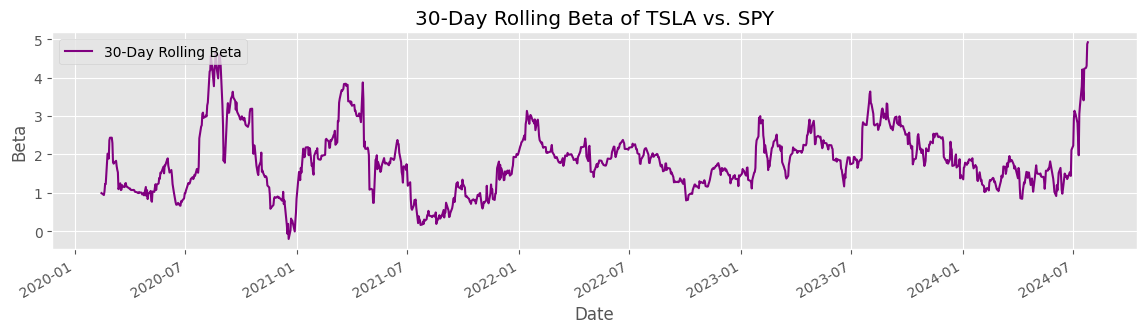

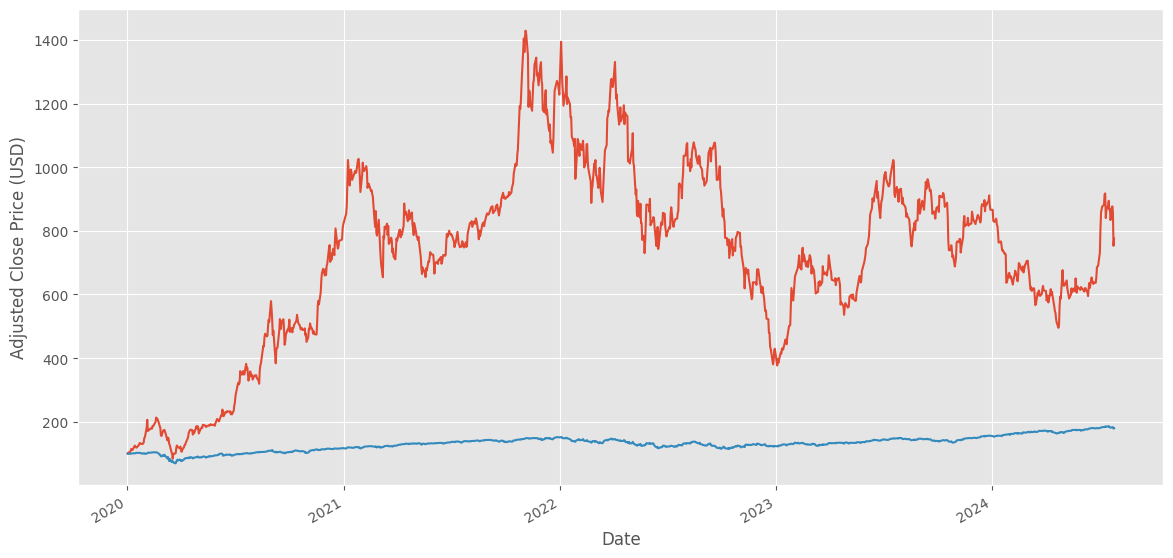

In [6]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import numpy as np

style.use ('ggplot')

start = dt.datetime(2020, 1, 1)
end = dt.datetime.now()
#df = web.DataReader("TSLA", 'yahoo', start, end)
df = yf.download("TSLA", start=start, end=end)
df.to_csv('tsla.csv')
#df = pd.read_csv('tsla.csv',parse_dates = True, index_col=0 )
#SPY = yf.download("SPY", start=start, end=end)
#print(df.head(10))
df_tsla = yf.download("TSLA", start=start, end=end)
df_spy = yf.download("SPY", start=start, end=end)


df_tsla['Growth'] = (df_tsla['Adj Close'] / df_tsla['Adj Close'].iloc[0]) * 100
df_spy['Growth'] = (df_spy['Adj Close'] / df_spy['Adj Close'].iloc[0]) * 100

returns_tsla = df_tsla['Adj Close'].pct_change().dropna()
returns_spy = df_spy['Adj Close'].pct_change().dropna()

rolling_covariance = returns_tsla.rolling(window=30).cov(returns_spy)
rolling_variance = returns_spy.rolling(window=30).var()
rolling_beta = rolling_covariance / rolling_variance

cov_matrix = np.cov(returns_tsla, returns_spy)
beta = cov_matrix[0, 1] / cov_matrix[1, 1]

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 2)
rolling_beta.plot(label='30-Day Rolling Beta', color='purple')
plt.title('30-Day Rolling Beta of TSLA vs. SPY')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.legend(loc='upper left')
plt.grid(True)


plt.figure(figsize=(14, 7))

#beta.plot()
df_tsla['Growth'].plot()
df_spy['Growth'].plot()

plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.show()




#df.reset_index(inplace=True)
#df.set_index("Date", inplace=True)
#df = df.drop("Symbol", axis=1)
